In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [48]:
df_raw = pd.read_csv('http://js.withsky.co.kr/data/mobile_log.csv')
df_raw.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [49]:
df = df_raw.copy()
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [55]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


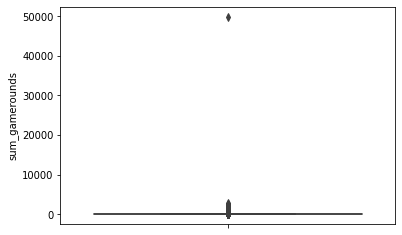

In [59]:
sns.boxplot( y="sum_gamerounds", hue='version', data=df)

In [72]:
#예외값 처리-표준편차*3 사용

def outlier(row, std=195.050858, mean=51.872457):
    if (row['sum_gamerounds']<=(mean-3*std)) | (row['sum_gamerounds']>=(mean+3*std)):
        return 0
    else:
        return 1
df['outlier']=df.apply(outlier, axis=1)
df=df[df['outlier']==1]

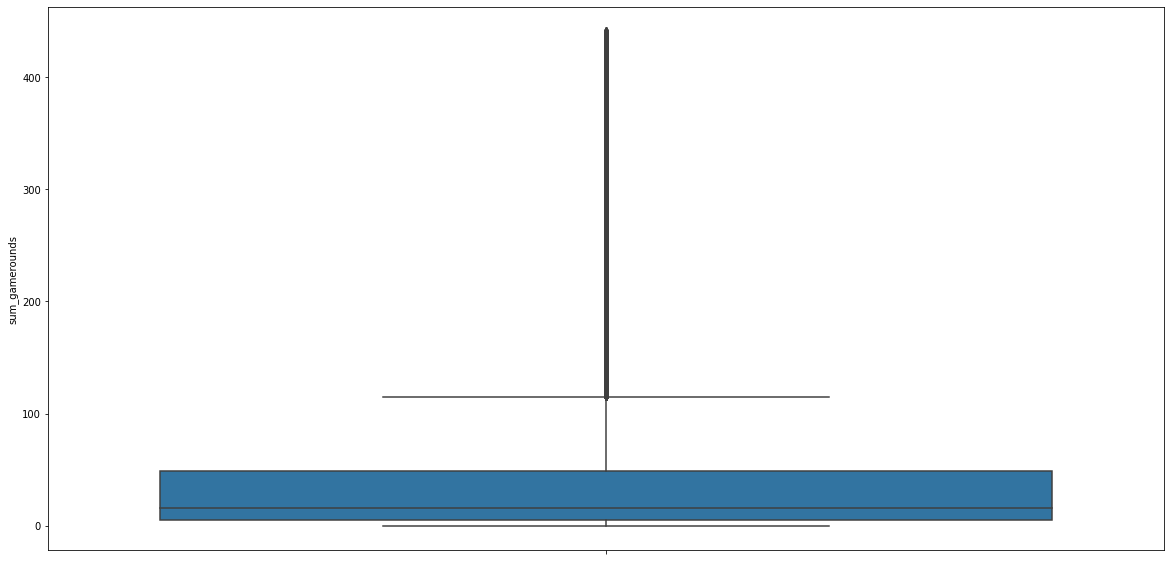

In [73]:
plt.figure(figsize=(20,10))
sns.boxplot( y="sum_gamerounds", hue='version', data=df)
plt.show()

In [74]:
def func(row):
    if (row['retention_1']==True) & (row['retention_7']==True):
        return 1
    elif (row['retention_1']==False) & (row['retention_7']==True):
        return 2
    elif (row['retention_1']==True) & (row['retention_7']==False):
        return 3
    else:
        return 4
df['re_no']=df.apply(func, axis=1)

In [75]:
df


,userid,version,sum_gamerounds,retention_1,retention_7,outlier,re_no
0,116,gate_30,3,False,False,1,4
1,337,gate_30,38,True,False,1,3
2,377,gate_40,165,True,False,1,3
3,483,gate_40,1,False,False,1,4
4,488,gate_40,179,True,True,1,1
...,...,...,...,...,...,...,...
90184,9999441,gate_40,97,True,False,1,3
90185,9999479,gate_40,30,False,False,1,4
90186,9999710,gate_30,28,True,False,1,3
90187,9999768,gate_40,51,True,False,1,3


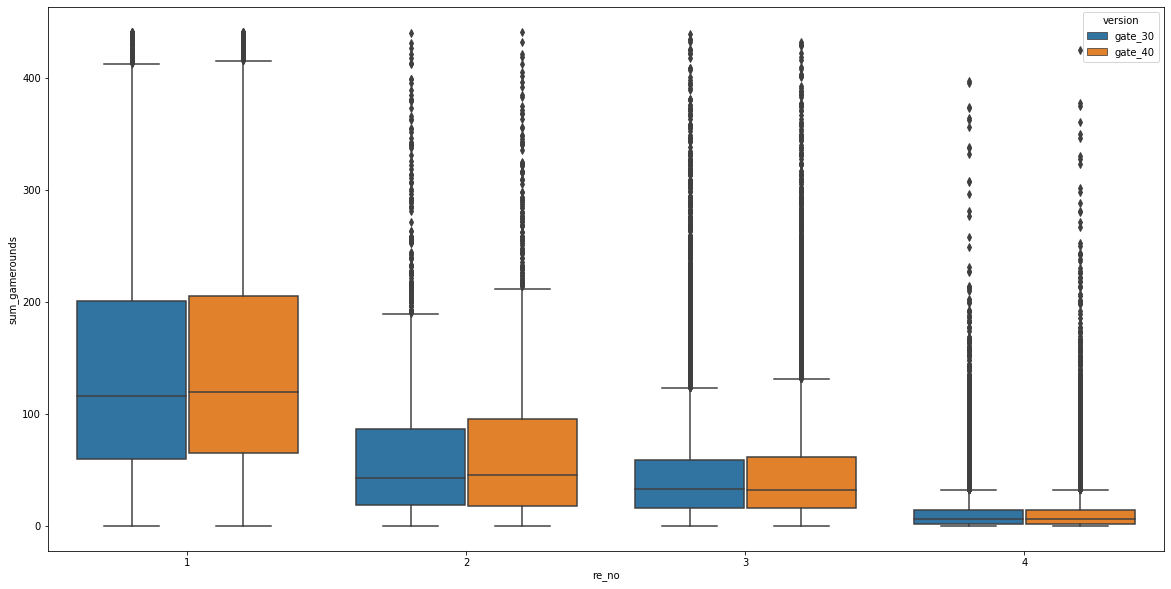

In [77]:
plt.figure(figsize=(20,10))
sns.boxplot(x='re_no', y="sum_gamerounds",  hue='version', data=df)
plt.show()

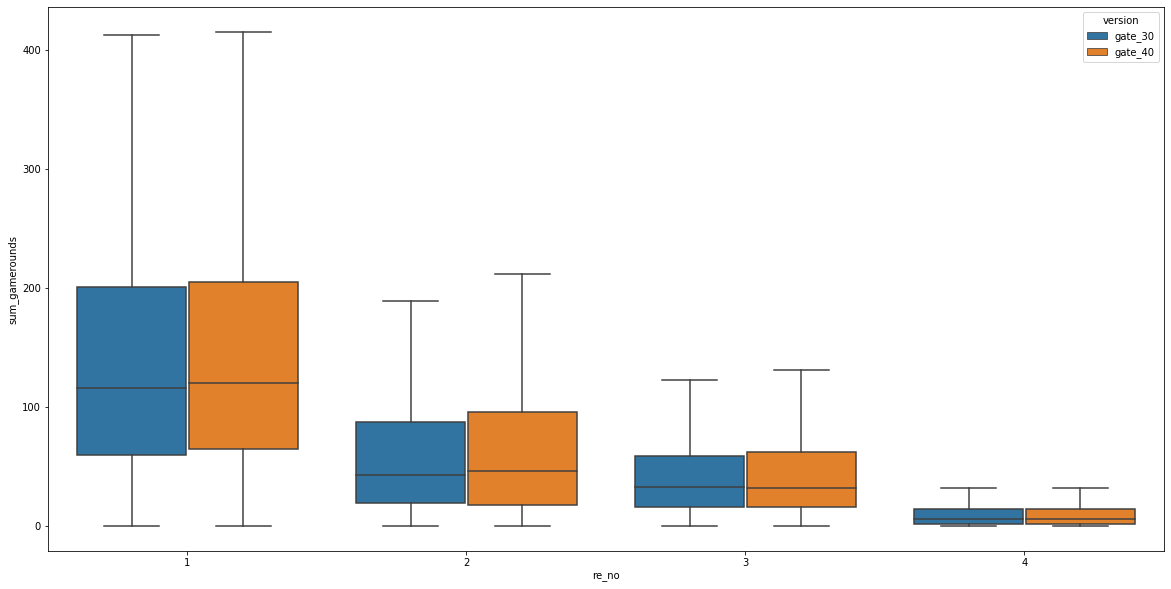

In [78]:
plt.figure(figsize=(20,10))
sns.boxplot(x='re_no', y="sum_gamerounds", showfliers=False, hue='version', data=df)
plt.show()

In [82]:
df1=df[df['re_no']==1]
df2=df[df['re_no']==2]
df3=df[df['re_no']==3]
df4=df[df['re_no']==4]

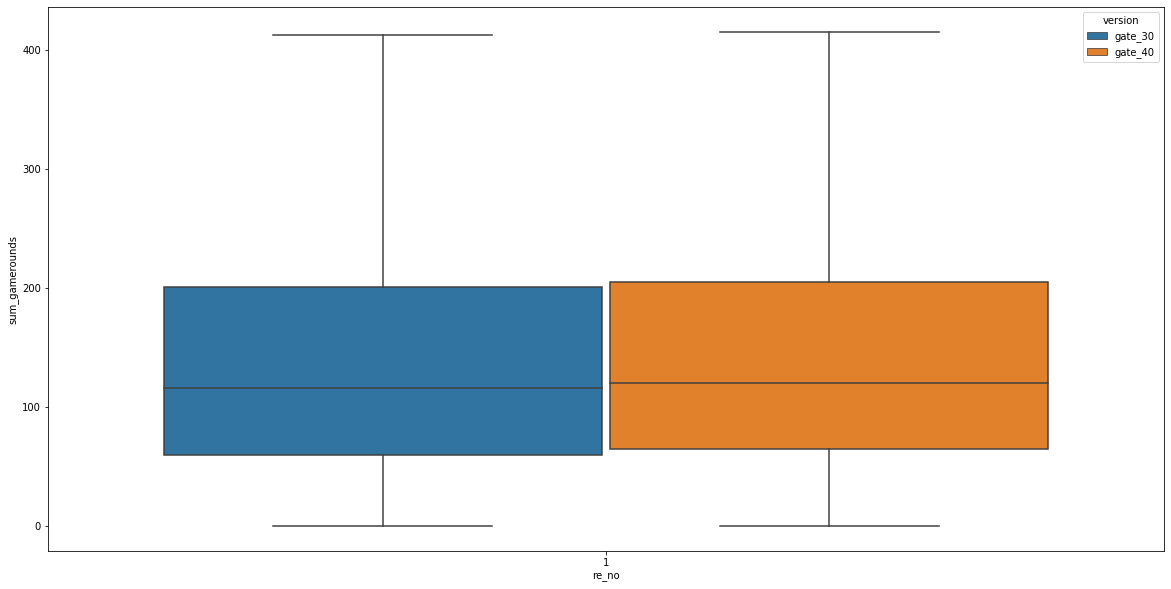

In [88]:
plt.figure(figsize=(20,10))
sns.boxplot(x='re_no', y="sum_gamerounds", showfliers=False, hue='version',hue_order=['gate_30','gate_40'], data=df1)
plt.show()

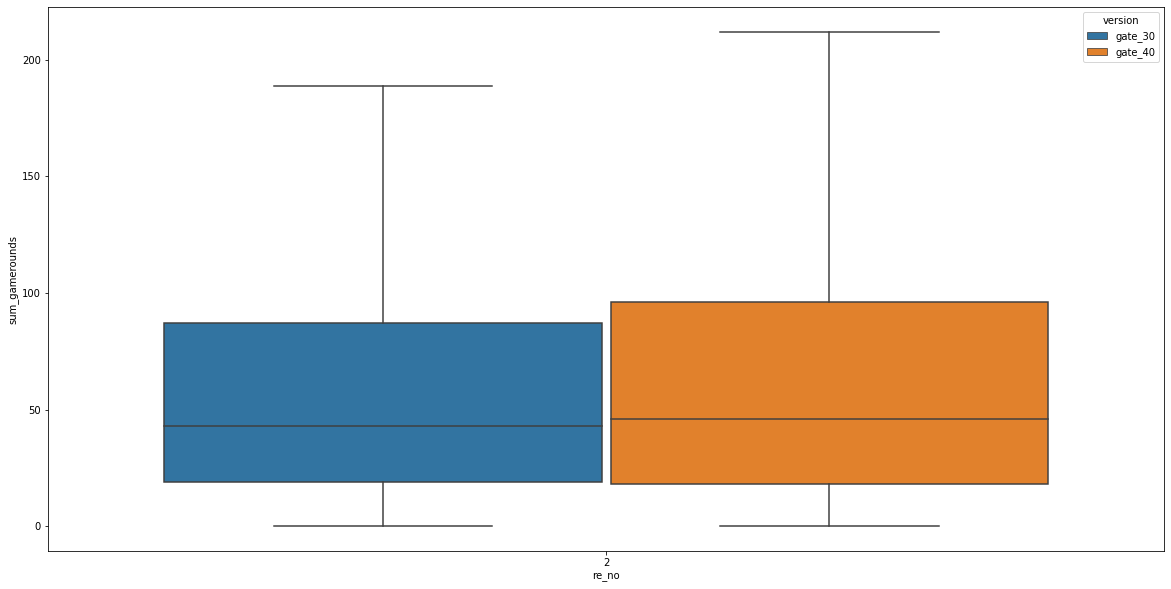

In [89]:
plt.figure(figsize=(20,10))
sns.boxplot(x='re_no', y="sum_gamerounds", showfliers=False,hue_order=['gate_30','gate_40'], hue='version', data=df2)
plt.show()

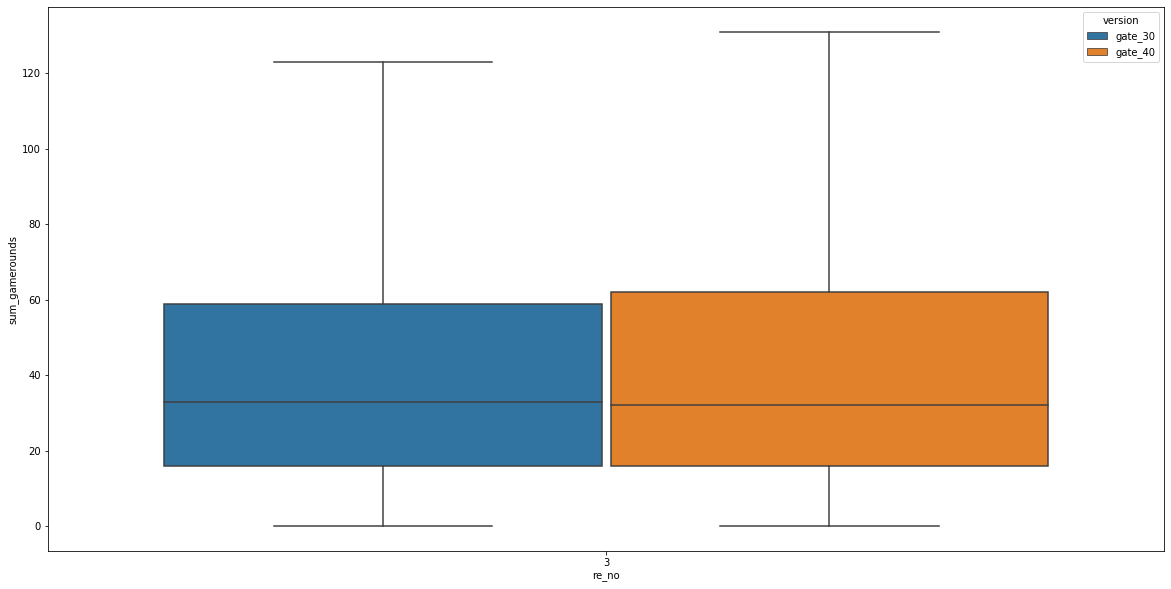

In [90]:
plt.figure(figsize=(20,10))
sns.boxplot(x='re_no', y="sum_gamerounds", showfliers=False,hue_order=['gate_30','gate_40'], hue='version', data=df3)
plt.show()

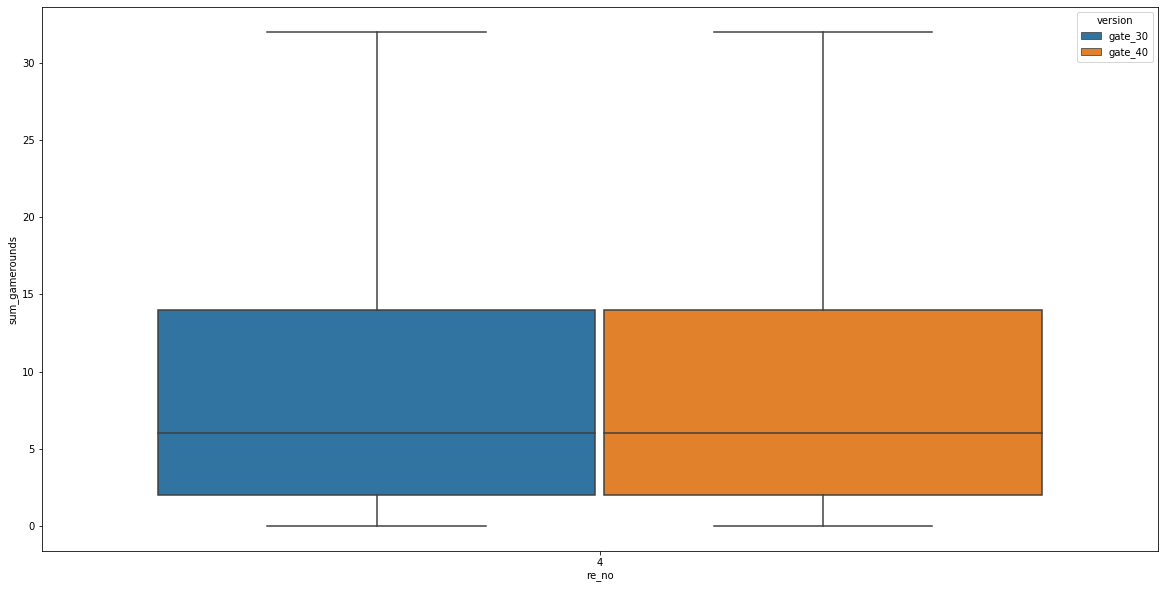

In [91]:
plt.figure(figsize=(20,10))
sns.boxplot(x='re_no', y="sum_gamerounds", showfliers=False,hue_order=['gate_30','gate_40'], hue='version', data=df4)
plt.show()